In [1]:
from pathlib import Path
from pandas import read_csv

TRAINING_DATASET_PATH = Path("../data/train_tweets.csv")
TEST_DATASET_PATH = Path("../data/test_tweets.csv")

TRAIN_DATA = read_csv(TRAINING_DATASET_PATH, sep=",")
TEST_DATASET_PATH = read_csv(TEST_DATASET_PATH, sep=",")

In [2]:
TRAIN_DATA.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
TRAIN_DATA.isnull().sum(axis=0)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
from tweet import TweetsAnalysis

analysis = TweetsAnalysis("Pre Cleaned Dataset", TRAIN_DATA)
TRAIN_DATA.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


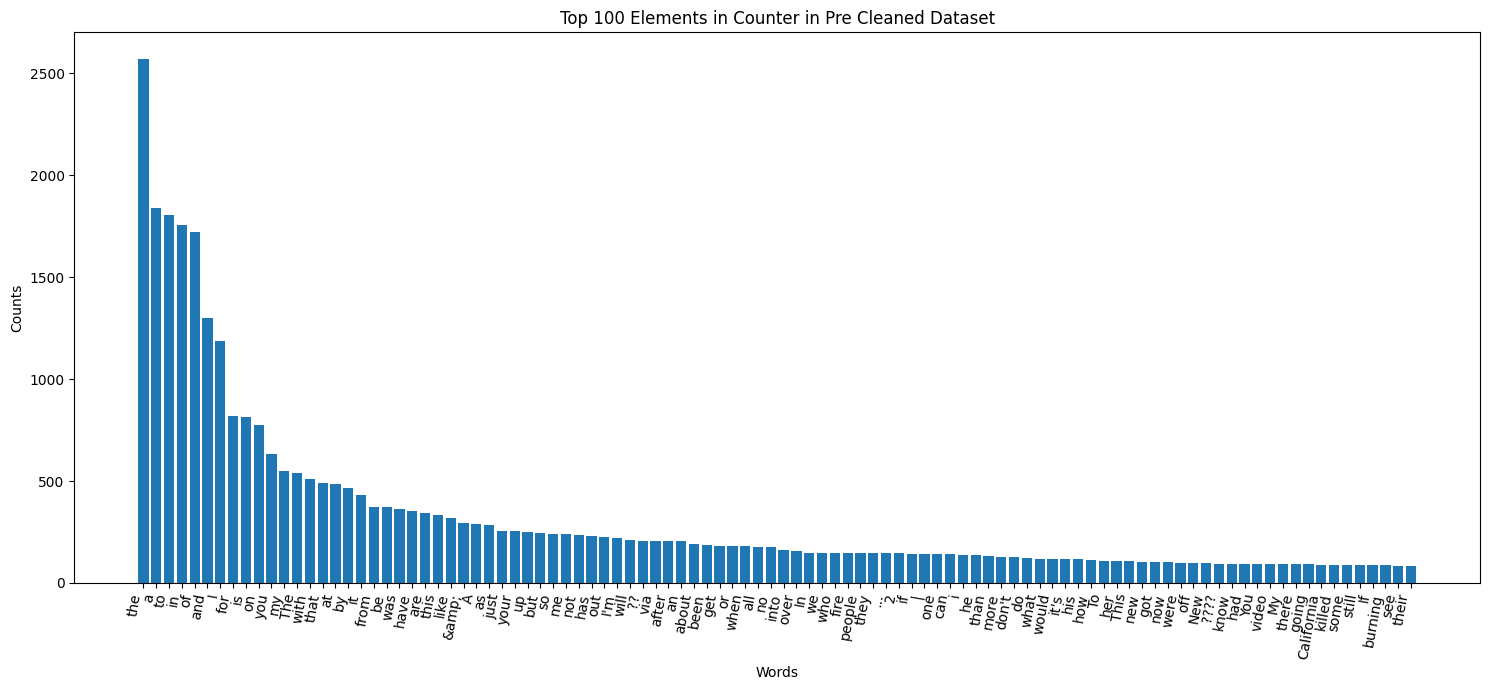

In [5]:
analysis.plt_word_occs()

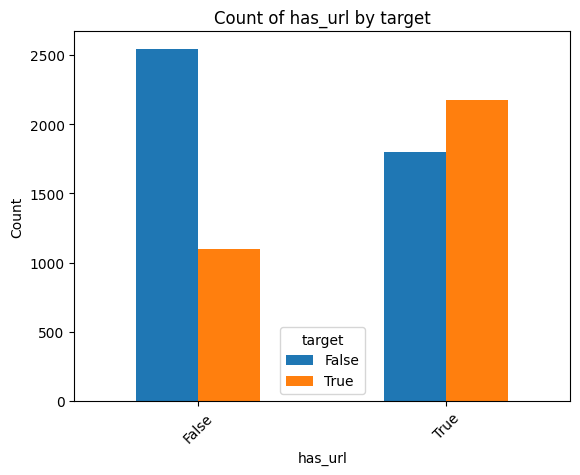

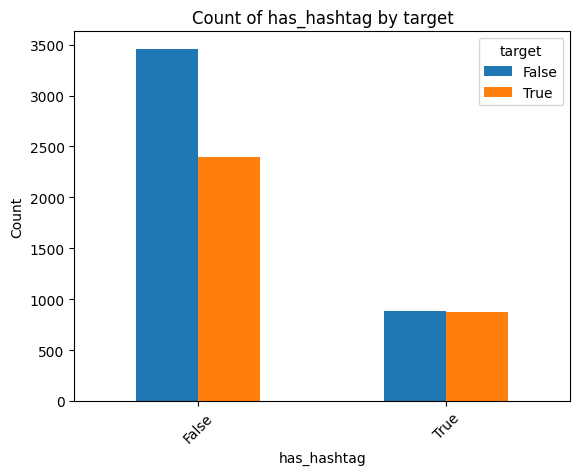

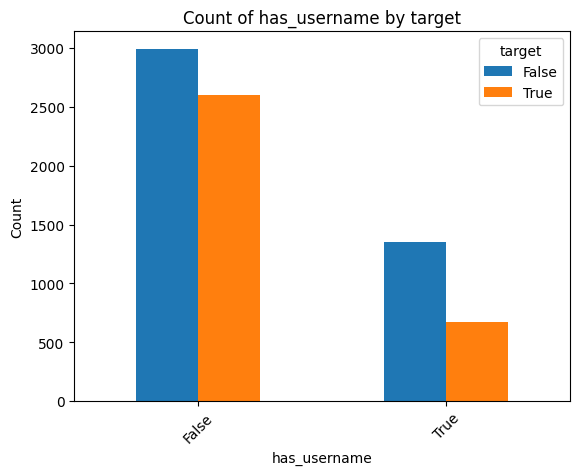

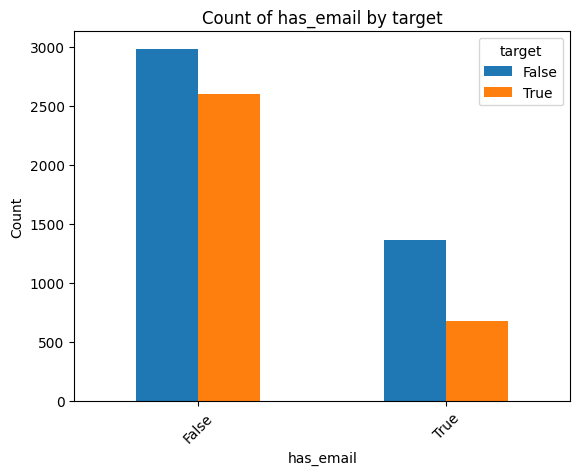

In [6]:
_CATEGORICAL_DATA = ["has_url","has_hashtag","has_username","has_email"]
PIVOT = "target"

analysis.plot_categorical_property(_CATEGORICAL_DATA, PIVOT)